In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


/var/folders/4w/tg26g4t17nb53pb9w7lf0zx00000gn/T/ipykernel_33967/502513737.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


Question 1

/var/folders/4w/tg26g4t17nb53pb9w7lf0zx00000gn/T/ipykernel_33967/1522815397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weekdays['DayName'] = df_weekdays['hour_beginning'].dt.day_name()


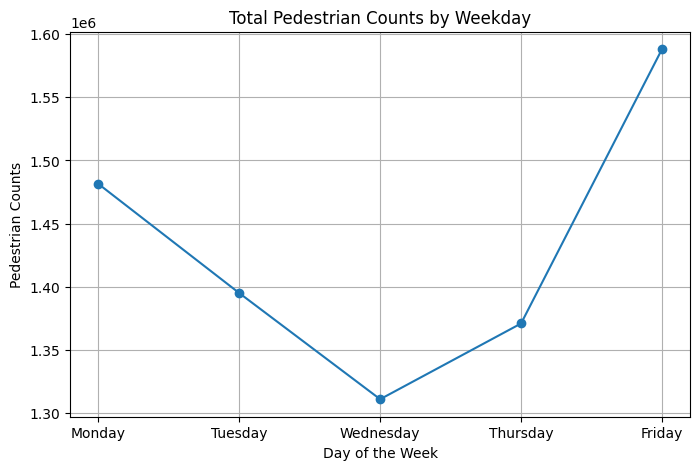

In [12]:
df_weekdays = df[df['hour_beginning'].dt.dayofweek < 5]
df_weekdays['DayName'] = df_weekdays['hour_beginning'].dt.day_name()

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekday_counts = df_weekdays.groupby('DayName')['Pedestrians'].sum().reindex(ordered_days)

plt.figure(figsize=(8, 5))
plt.plot(weekday_counts.index, weekday_counts.values, marker='o', linestyle='-')
plt.title('Total Pedestrian Counts by Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Pedestrian Counts')
plt.grid(True)
plt.show()

Question 2 

Correlation Matrix between Pedestrian Counts and Weather Conditions (Brooklyn Bridge, 2019):
                             Pedestrians  Weather_clear-day  \
Pedestrians                     1.000000           0.339758   
Weather_clear-day               0.339758           1.000000   
Weather_clear-night            -0.377297          -0.227660   
Weather_cloudy                 -0.081255          -0.224004   
Weather_fog                    -0.026457          -0.022002   
Weather_partly-cloudy-day       0.497867          -0.220884   
Weather_partly-cloudy-night    -0.282081          -0.175456   
Weather_rain                   -0.138581          -0.119645   
Weather_sleet                  -0.017091          -0.013257   
Weather_snow                   -0.034052          -0.028943   
Weather_wind                   -0.000170          -0.009372   

                             Weather_clear-night  Weather_cloudy  Weather_fog  \
Pedestrians                            -0.377297       -0.081255    -

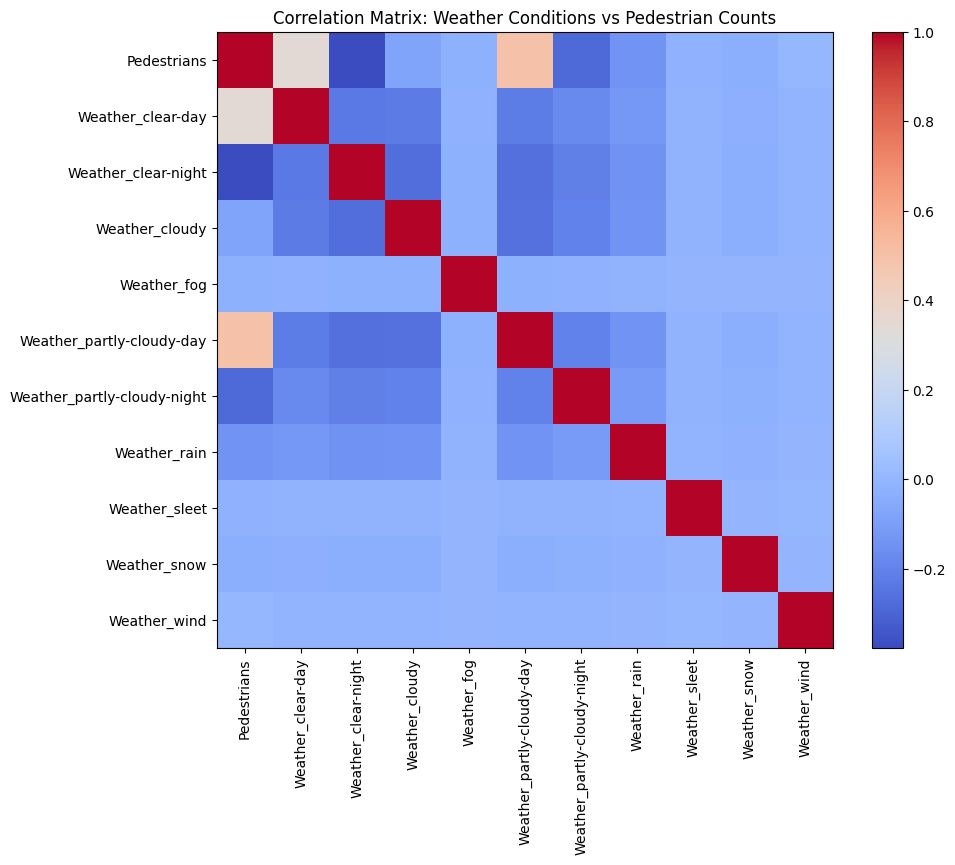

In [13]:
df_2019 = df[(df['hour_beginning'].dt.year == 2019) & (df['location'] == 'Brooklyn Bridge')]
weather_dummies = pd.get_dummies(df_2019['weather_summary'], prefix='Weather')
df_encoded = pd.concat([df_2019[['Pedestrians']], weather_dummies], axis=1)

corr_matrix = df_encoded.corr()

print("Correlation Matrix between Pedestrian Counts and Weather Conditions (Brooklyn Bridge, 2019):")
print(corr_matrix)

plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.index)
plt.title("Correlation Matrix: Weather Conditions vs Pedestrian Counts")
plt.show()


Total Pedestrian Counts by Time of Day:
TimeOfDay
morning      2480582
afternoon    5852025
evening      2432145
night         268114
Name: Pedestrians, dtype: int64


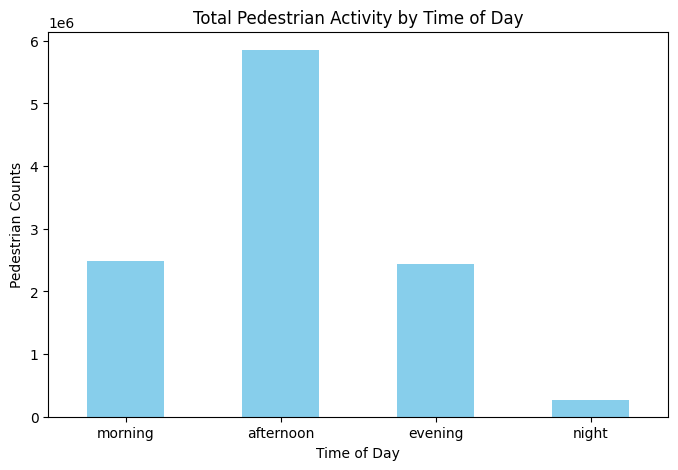

In [14]:
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

df['Hour'] = df['hour_beginning'].dt.hour
df['TimeOfDay'] = df['Hour'].apply(get_time_of_day)
time_activity = df.groupby('TimeOfDay')['Pedestrians'].sum()

ordered_time = ['morning', 'afternoon', 'evening', 'night']
time_activity = time_activity.reindex(ordered_time)

print("\nTotal Pedestrian Counts by Time of Day:")
print(time_activity)

plt.figure(figsize=(8, 5))
time_activity.plot(kind='bar', color='skyblue')
plt.title('Total Pedestrian Activity by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Pedestrian Counts')
plt.xticks(rotation=0)
plt.show()